## Innoplexus

In [1]:
## import the libraries
import pandas as pd
import numpy as np
import nltk
import re

In [2]:
train_data = pd.read_csv("train_F3WbcTw.csv", na_values = ("NA", " ", ""))
data_test = pd.read_csv("test_tOlRoBf.csv", na_values = ("NA", " ", ""))

In [3]:
print(train_data.shape)
print(data_test.shape)

(5279, 4)
(2924, 3)


In [4]:
train_data.head()
#data_test.head()

,unique_hash,text,drug,sentiment
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1


In [5]:
train_data1 = train_data[train_data.sentiment == 1]
train_data2 = train_data[train_data.sentiment == 2][0:1000]
train_data0 = train_data[train_data.sentiment == 0]

In [6]:
del train_data
train_data = train_data1.append(train_data2)
train_data = train_data.append(train_data0)

In [7]:
train_data.sentiment.value_counts()

2    1000
1     837
0     617
Name: sentiment, dtype: int64

In [8]:
data = train_data.sample(frac=1).reset_index(drop = True)

In [9]:
del train_data, train_data0, train_data1, train_data2

In [12]:
unique_hash = data_test["unique_hash"]

In [13]:
## Cleaning the training data set
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download("stopwords")
corpus = []
for i in range(0, 2454):
    data["text"][0]   ## check the first text
    text = re.sub('[^a-zA-z]', " ", data["text"][i])
    text = text.lower()
    text = text.split()
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text if not word in set(stopwords.words("english"))]
    text = " ".join(text)
    corpus.append(text)

[nltk_data] Downloading package stopwords to C:\Users\VIVAN
[nltk_data]     DSOUZA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
## print the training corpus
#corpus

In [15]:
len1 = []
for i in data['text']:
    word = 0
    for ii in i.split():
        word += 1
    len1.append(word)

In [16]:
max(len1)

6498

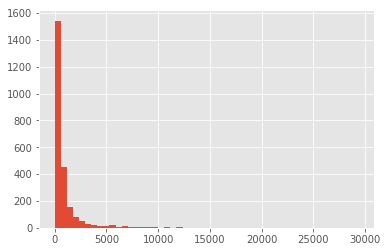

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use("ggplot")
plt.hist([len(s) for s in corpus], bins=50) 
plt.show()

In [18]:
## Clearning the testing data
corpus_test = []
for i in range(0, 2924):
    data_test["text"][0]
    text = re.sub('[^a-zA-z]', " ", data_test["text"][i])
    text = text.lower()
    text = text.split()
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text if not word in set(stopwords.words("english"))]
    text = " ".join(text)
    corpus_test.append(text)

In [19]:
## print the test corpus
#corpus_test

In [20]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

C:\Users\VIVAN DSOUZA\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [21]:
t = Tokenizer()
t.fit_on_texts(corpus)
t.fit_on_texts(corpus_test)
print(t.word_index)

{'cancer': 1, 'patient': 2, 'treatment': 3, 'may': 4, 'use': 5, 'drug': 6, 'ms': 7, 'diseas': 8, 'effect': 9, 'year': 10, 'cell': 11, 'also': 12, 'studi': 13, 'trial': 14, 'therapi': 15, 'get': 16, 'one': 17, 'time': 18, 'take': 19, 'like': 20, 'month': 21, 'week': 22, 'clinic': 23, 'new': 24, 'lung': 25, 'work': 26, 'doctor': 27, 'medic': 28, 'progress': 29, 'day': 30, 'first': 31, 'start': 32, 'side': 33, 'help': 34, 'would': 35, 'treat': 36, 'peopl': 37, 'blood': 38, 'go': 39, 'dose': 40, 'call': 41, 'tumor': 42, 'risk': 43, 'includ': 44, 'test': 45, 'mg': 46, 'need': 47, 'type': 48, 'crohn': 49, 'research': 50, 'well': 51, 'know': 52, 'approv': 53, 'follow': 54, 'symptom': 55, 'see': 56, 'result': 57, 'make': 58, 'pain': 59, 'inform': 60, 'two': 61, 'caus': 62, 'feel': 63, 'good': 64, 'sever': 65, 'bodi': 66, 'inject': 67, 'medicin': 68, 'surgeri': 69, 'post': 70, 'activ': 71, 'system': 72, 'relaps': 73, 'back': 74, 'develop': 75, 'think': 76, 'brain': 77, 'receiv': 78, 'chang': 79

In [22]:
# ## test
# t_test = Tokenizer()
# t_test.fit_on_texts(corpus_test)
# # print(t_test.word_index)

In [23]:
vocal_size = len(t.word_index)+1
print(vocal_size)

26027


In [24]:
encoded_docs = t.texts_to_sequences(corpus)
#print(encoded_docs)

In [25]:
## Test
encoded_docs_test = t.texts_to_sequences(corpus_test)

In [26]:
encoded_docs[0]

[154,
 61,
 22,
 180,
 381,
 33,
 547,
 337,
 1149,
 1475,
 389,
 1149,
 1157,
 22,
 180,
 32,
 63,
 20,
 1130,
 141,
 286,
 16496,
 17,
 540,
 495,
 98,
 104,
 139,
 470,
 398,
 934,
 7,
 1885,
 550,
 12761,
 1116,
 2026,
 3157,
 385,
 569,
 402,
 697,
 563,
 806,
 3414,
 1769,
 2548,
 1711,
 831,
 988,
 2193,
 2750,
 59,
 2134,
 12762,
 17,
 33,
 18,
 264,
 19,
 410,
 218,
 216,
 202,
 319,
 2394,
 139,
 470,
 398,
 934,
 63,
 20,
 1188,
 999,
 550,
 10899,
 1116,
 1349,
 337,
 5545,
 30,
 1931,
 18,
 30,
 2177,
 168,
 88,
 450,
 2212,
 1123,
 1656,
 216,
 1809,
 26,
 920,
 464,
 3620,
 284,
 204,
 3678,
 337,
 74,
 1227,
 284,
 321,
 26,
 90,
 762,
 139,
 470,
 398,
 934,
 266,
 322,
 516,
 550,
 2441,
 323,
 1116,
 1349,
 8617,
 8617,
 993,
 8618,
 2549,
 16497,
 239,
 270,
 675,
 12763,
 19,
 12763,
 9,
 322,
 516,
 1547,
 55,
 87,
 2996,
 62,
 55,
 1903,
 98,
 2178,
 157,
 139,
 470,
 398,
 934,
 3836,
 5,
 1670,
 550,
 9487,
 1116,
 1349,
 16498,
 16499,
 91,
 135,
 16500,
 1650

In [27]:
max_length = 1250
padded_docs = pad_sequences(encoded_docs, maxlen = max_length, padding = "post")

In [28]:
## test
padd_docs_test = pad_sequences(encoded_docs_test, maxlen = max_length, padding = "post")

In [29]:
## target variable

In [30]:
sentiment = data["sentiment"]

In [31]:
from keras import utils

In [32]:
y_train = utils.to_categorical(sentiment, num_classes=3, dtype='float32')
y_train

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [33]:
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import Dense
from keras.layers import Flatten

In [34]:
## Define the model
model = Sequential()
model.add(Embedding(vocal_size, 100, input_length = max_length))
model.add(Flatten())
model.add(Dense(3, activation = "softmax"))

In [35]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1250, 100)         2602700   
_________________________________________________________________
flatten_1 (Flatten)          (None, 125000)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 375003    
Total params: 2,977,703
Trainable params: 2,977,703
Non-trainable params: 0
_________________________________________________________________
None


In [36]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["acc"])

In [37]:
model.fit(padded_docs, y_train, epochs = 10, validation_split=0.2, batch_size=32, verbose=1)

Train on 1963 samples, validate on 491 samples
Epoch 1/10
1963/1963 [==============================] - 8s 4ms/step - loss: 0.7327 - acc: 0.6334 - val_loss: 0.6324 - val_acc: 0.6660
Epoch 2/10
1963/1963 [==============================] - 8s 4ms/step - loss: 0.5228 - acc: 0.7431 - val_loss: 0.6147 - val_acc: 0.6707
Epoch 3/10
1963/1963 [==============================] - 8s 4ms/step - loss: 0.3395 - acc: 0.8929 - val_loss: 0.5895 - val_acc: 0.6972
Epoch 4/10
1963/1963 [==============================] - 8s 4ms/step - loss: 0.1742 - acc: 0.9671 - val_loss: 0.5793 - val_acc: 0.7040
Epoch 5/10
1963/1963 [==============================] - 8s 4ms/step - loss: 0.0878 - acc: 0.9910 - val_loss: 0.5826 - val_acc: 0.6918
Epoch 6/10
1963/1963 [==============================] - 8s 4ms/step - loss: 0.0489 - acc: 0.9961 - val_loss: 0.5914 - val_acc: 0.6959
Epoch 7/10
1963/1963 [==============================] - 8s 4ms/step - loss: 0.0293 - acc: 0.9985 - val_loss: 0.5921 - val_acc: 0.6938
Epoch 8/10
1963

In [38]:
test_pre = model.predict(padd_docs_test)

In [39]:
test_pre = np.argmax(test_pre, axis=1)

In [40]:
submission = pd.DataFrame(data_test['unique_hash'])
submission['sentiment'] = pd.Series(test_pre)

In [41]:
submission.sentiment.value_counts()

2    1621
1     865
0     438
Name: sentiment, dtype: int64

In [42]:
submission.to_csv("14_sub.csv", index = False)